In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(dpi=150)

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

In [3]:
df = pd.read_csv('../csv/preprocessed/7_label_blood_sugar.csv')

In [4]:
target = df.pop('식전혈당(공복혈당)')

x = df.values
y = target.values.reshape(-1, 1)

In [5]:
columns = df.columns
columns

Index(['성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
       '시력(좌)', '시력(우)', '수축기혈압', '이완기혈압', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤',
       'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT',
       '감마지티피', '흡연상태', '음주여부', 'BMI'],
      dtype='object')

In [12]:
def get_feature_selection_result(selector, importances):
    result = []
    is_selected = selector.get_support()

    for idx in range(len(columns)):
        selected = True if is_selected[idx] == 1 else False
        result.append([columns[idx], importances[idx], selected])
    result.sort(key=lambda x: abs(x[1]), reverse=True)

    df_to_print = pd.DataFrame(result, columns=['feature', 'importance', 'selected'])
    return df_to_print

In [38]:
def result_to_plot(model, result):
    base_line = 1.0 / 23
    colors = []
    for value in result['importance']:
        colors.append('blue' if value > base_line else 'grey')

    plt.bar(result['feature'], result['importance'], color=colors)
    plt.axhline(y=base_line, color='r', linestyle='-')

    plt.title('Feature Selection with %s' %(model))
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.xticks(rotation=90)
    plt.show()

# RandomForestClassifier

In [8]:
selector_RFC = SelectFromModel(estimator=RandomForestClassifier()).fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:234: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [9]:
selected_RFC = columns[selector_RFC.get_support()]
selected_RFC

Index(['연령대코드(5세단위)', '허리둘레', '수축기혈압', '이완기혈압', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피',
       'BMI'],
      dtype='object')

In [14]:
result_RFC = get_feature_selection_result(selector_RFC, selector_RFC.estimator_.feature_importances_)
result_RFC

,feature,importance,selected
0,트리글리세라이드,0.069625,True
1,LDL콜레스테롤,0.067697,True
2,감마지티피,0.066036,True
3,총콜레스테롤,0.065470,True
4,허리둘레,0.060071,True
5,혈색소,0.059536,True
6,(혈청지오티)AST,0.059033,True
7,(혈청지오티)ALT,0.057030,True
8,HDL콜레스테롤,0.055578,True
9,수축기혈압,0.054981,True


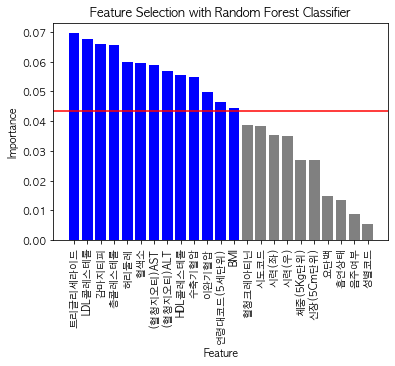

In [39]:
result_to_plot('Random Forest Classifier', result_RFC)

# GradientBoostingClassifier

In [22]:
selector_GBC = SelectFromModel(estimator=GradientBoostingClassifier()).fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [23]:
selected_GBC = columns[selector_GBC.get_support()]
selected_GBC

Index(['연령대코드(5세단위)', '허리둘레', '총콜레스테롤', '트리글리세라이드', 'LDL콜레스테롤', '요단백',
       '(혈청지오티)AST', '감마지티피'],
      dtype='object')

In [24]:
result_GBC = get_feature_selection_result(selector_GBC, selector_GBC.estimator_.feature_importances_)
result_GBC

,feature,importance,selected
0,연령대코드(5세단위),0.281794,True
1,감마지티피,0.142962,True
2,LDL콜레스테롤,0.112278,True
3,허리둘레,0.108112,True
4,요단백,0.077016,True
5,트리글리세라이드,0.071481,True
6,(혈청지오티)AST,0.053425,True
7,총콜레스테롤,0.050260,True
8,(혈청지오티)ALT,0.031157,False
9,수축기혈압,0.029123,False


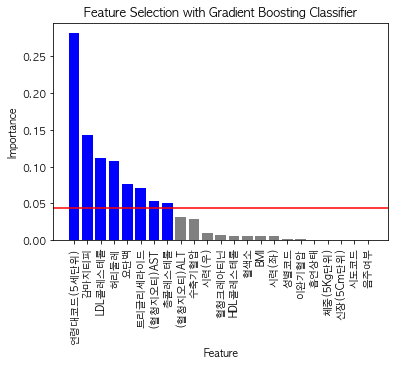

In [40]:
result_to_plot('Gradient Boosting Classifier', result_GBC)

# LogisticRegression

In [45]:
selector_LR = SelectFromModel(estimator=LogisticRegression()).fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
selected_LR = columns[selector_LR.get_support()]
selected_LR

Index(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '혈색소', '요단백', '흡연상태',
       'BMI'],
      dtype='object')

In [47]:
result_LR = get_feature_selection_result(selector_LR, selector_LR.estimator_.coef_[0])
result_LR

,feature,importance,selected
0,연령대코드(5세단위),0.223546,True
1,BMI,-0.115665,True
2,체중(5Kg단위),0.061853,True
3,요단백,0.055820,True
4,신장(5Cm단위),-0.053365,True
5,혈색소,0.043359,True
6,흡연상태,0.042204,True
7,성별코드,-0.041660,True
8,허리둘레,0.018998,False
9,시력(우),-0.016125,False


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


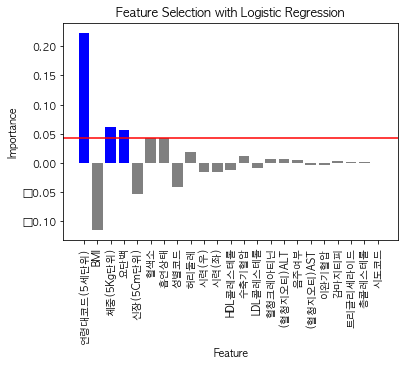

In [48]:
result_to_plot('Logistic Regression', result_LR)

# DecisionTreeClassifier

In [41]:
selector_DTC = SelectFromModel(estimator=DecisionTreeClassifier()).fit(x, y)

In [42]:
selected_DTC = columns[selector_DTC.get_support()]
selected_DTC

Index(['연령대코드(5세단위)', '허리둘레', '수축기혈압', '이완기혈압', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피',
       'BMI'],
      dtype='object')

In [43]:
result_DTC = get_feature_selection_result(selector_DTC, selector_DTC.estimator_.feature_importances_)
result_DTC

,feature,importance,selected
0,트리글리세라이드,0.073541,True
1,감마지티피,0.073510,True
2,LDL콜레스테롤,0.071338,True
3,혈색소,0.062814,True
4,허리둘레,0.060451,True
5,총콜레스테롤,0.059312,True
6,(혈청지오티)ALT,0.057372,True
7,HDL콜레스테롤,0.056656,True
8,(혈청지오티)AST,0.055998,True
9,수축기혈압,0.055239,True


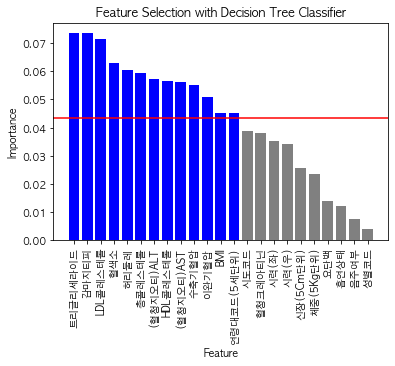

In [44]:
result_to_plot('Decision Tree Classifier', result_DTC)